In [126]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import math

In [ ]:
xl = pd.ExcelFile('full_1qgt.xlsx')

In [137]:
distances = []
aas = []
other_aas = []
for pa in xl.sheet_names:
    data = xl.parse(pa, header=1)
    for c in data.columns:
        if 'Distance' in c:
            extra = c.split('Distance')[-1]
            for i, d in enumerate(data[c]):
                if d < 5:
                    distances.append(d)
                    col = 'AA/RN' + extra
                    aas.append(data[col][i])
                    othercol = 'Other AA' + extra
                    oaa = data[othercol][i]
                    other_aas.append('None' if oaa != oaa else oaa)

aa_counts = dict()
aa_dists = dict()
other_aa_counts = dict()

for i, a in enumerate(other_aas):
    a = ''.join(x for x in a if x.isalpha()) #count by only AA and not RES#
    other_aa_counts[a] = other_aa_counts.get(a, 0) + 1

for i, a in enumerate(aas):
    a = ''.join(x for x in a if x.isalpha()) #count by only AA and not RES#
    aa_counts[a] = aa_counts.get(a, 0) + 1
    if a not in aa_dists.keys():
        aa_dists[a] = []
    aa_dists[a].append(distances[i])
for a in aa_dists:
    aa_dists[a] = statistics.fmean(aa_dists[a])

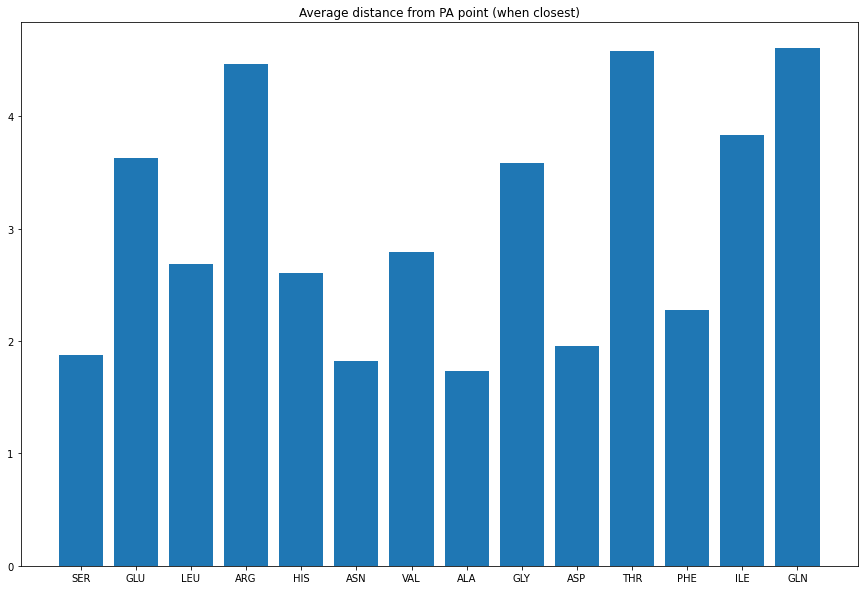

In [116]:
#Avg distance vs AAs
matplotlib.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
ax.set_title('Average distance from PA point (when closest)')
plt.bar(*zip(*aa_dists.items()))
plt.show()

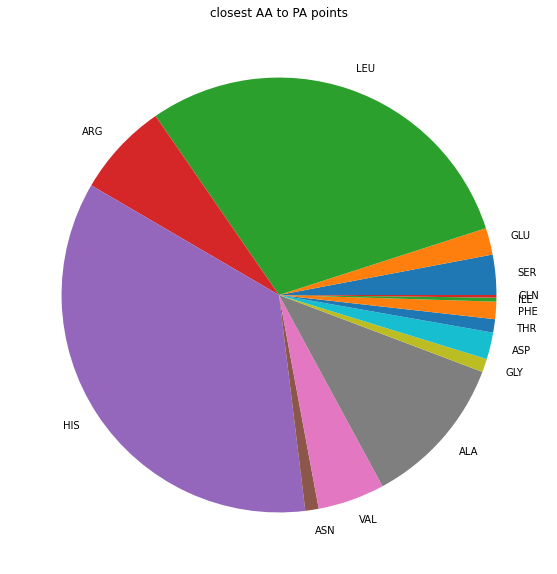

In [121]:
#closest AAs (pie)
matplotlib.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
ax.set_title('closest AA to PA points')
counts = list(aa_counts.values())
labels = list(aa_counts.keys())
plt.pie(counts, labels=labels)
plt.show()

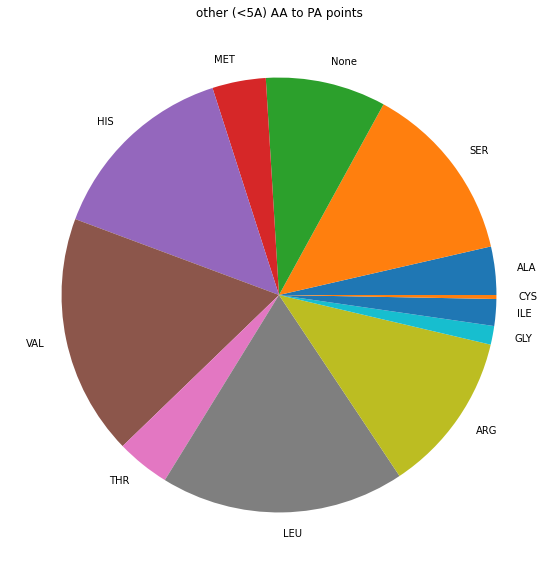

In [139]:
#other AAs (<5A but not closest) (pie)
matplotlib.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
ax.set_title('other (<5A) AA to PA points')
counts = list(other_aa_counts.values())
labels = list(other_aa_counts.keys())
plt.pie(counts, labels=labels)
plt.show()